In [1]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
spFilePath = r'C:\Users\kumar\OneDrive\Documents\Projects\Shakespeare\data\external\Shakespeare_data.csv'
spDF = pd.read_csv(spFilePath)
spDF


,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil
8,9,Henry IV,1.0,1.1.6,KING HENRY IV,Shall daub her lips with her own children's bl...
9,10,Henry IV,1.0,1.1.7,KING HENRY IV,"Nor more shall trenching war channel her fields,"


In [3]:
from sklearn.datasets import load_iris
from sklearn import tree


In [4]:
players = spDF.Player.unique()
i=0
labPly = dict()
for player in players:
    labPly[player]=i
    i=i+1

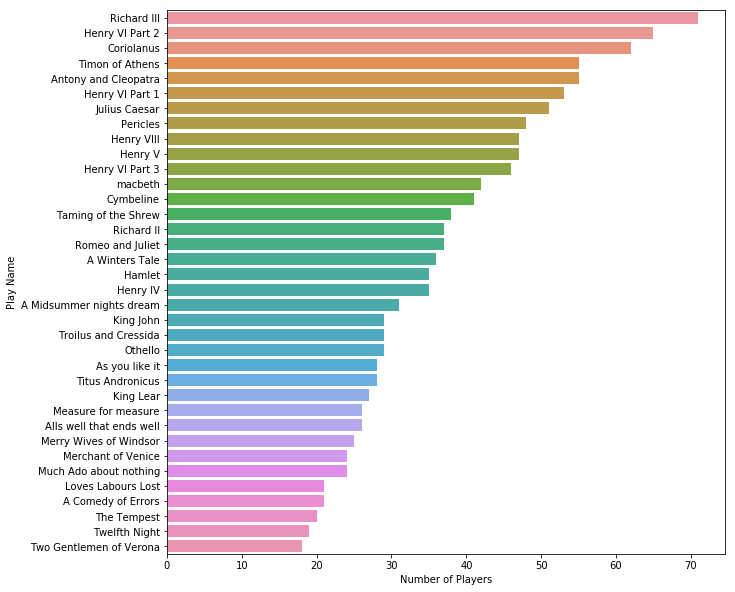

In [62]:
# Shows number of Players in Each Plays
import numpy as np

numberPlayers = spDF.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()
numberPlayers['Play'] = numberPlayers.index.tolist()
numberPlayers.columns = ['Num Players','Play']
numberPlayers.index= np.arange(0,len(numberPlayers))
numberPlayers

plt.figure(figsize=(10,10))
ax = sns.barplot(x='Num Players',y='Play',data=numberPlayers)
ax.set(xlabel='Number of Players', ylabel='Play Name')
plt.show()


In [6]:
# Convert Players to Labels
lbSPDF = spDF.replace({"Player": labPly})

In [52]:
# Feature Engineering
# Since Text cannot be used to classify, we find tfidf of all the playerlines
# Using this we will get the feature vectors, which then can be used to classify

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(lbSPDF.PlayerLine).toarray()
features.shape

(105153, 10568)

In [54]:
# Split Total Data into Train and Test
from sklearn.model_selection import train_test_split

lbSPDF = lbSPDF.dropna()

# one_hot_data = pd.get_dummies(lbSPDF.PlayerLine,drop_first=True,sparse=True)

#Player Line is the data and Player is the Classification

X_train, X_test, y_train, y_test = train_test_split(lbSPDF.PlayerLine, lbSPDF.Player, random_state=1)

In [55]:
# Classification using Naive Byes


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Run Training
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [56]:
# Run Testing and print accuracy
clf.score(count_vect.transform(X_test), y_test)

0.0328654570352619

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The mi

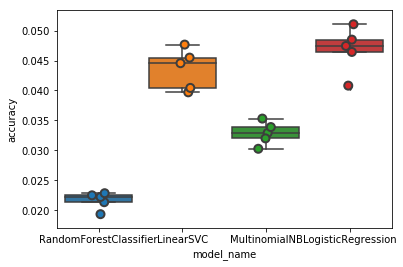

In [57]:

# Classification using 4 models
#   1)Random Forest 
#   2) Support Vector Machine
#   3)Naive Byes
#   4)Logistic Regression

# Cross Validation is used

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, lbSPDF.Player, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [59]:
# Accuracies after Classification using cross validation for all models
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.019356
1,RandomForestClassifier,1,0.021355
2,RandomForestClassifier,2,0.022505
3,RandomForestClassifier,3,0.022229
4,RandomForestClassifier,4,0.022854
5,LinearSVC,0,0.039692
6,LinearSVC,1,0.047659
7,LinearSVC,2,0.045485
8,LinearSVC,3,0.044553
9,LinearSVC,4,0.040430


In [60]:
# Average accuracy for each model
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.043564
LogisticRegression        0.046845
MultinomialNB             0.032881
RandomForestClassifier    0.021660
Name: accuracy, dtype: float64